YOUR FULL NAME

 - Alayna Arnolie
 - Collaborator 2
 - etc

DS325, Gettysburg College, Professor Eatai Roth
# Problem Set 1 - Linear Regression

Due Friday Feb 13, 2025 11:30a

Total pts: 20

## IMPORTANT INSTRUCTIONS:

 - When you submit your code, make sure that every cell runs without returning an error.
 - Once you have the results you need, edit out any extraneous code and outputs.
 - Do not rewrite code if it doesn't need to be rewritten. For example, all the import statements you should need are in the first code block. Do not redo those in your analysis.

## Problem 1

 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

In [3]:
import pandas as pd
import numpy as np
import sklearn as sk
from sklearn.datasets import make_regression

import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
np.random.seed(1)
bias = 20 * np.random.randn()

# Generate synthetic regression dataset
X, y, coef = make_regression(n_samples=300,  
                             n_features=5,  # More than 1 feature
                             noise=30,  
                             bias=bias,  
                             random_state=1,  
                             shuffle=False,  
                             coef=True)

# Convert to DataFrame for better readability
column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg_df = pd.DataFrame(data=X, columns=column_names)
reg_df['y'] = y

# Display the first few rows
reg_df.head()

,x1,x2,x3,x4,x5,y
0,1.624345,-0.611756,-0.528172,-1.072969,0.865408,28.865495
1,-2.301539,1.744812,-0.761207,0.319039,-0.249370,4.937580
2,1.462108,-2.060141,-0.322417,-0.384054,1.133769,-39.935140
3,-1.099891,-0.172428,-0.877858,0.042214,0.582815,-49.524568
4,-1.100619,1.144724,0.901591,0.502494,0.900856,244.382026


Intercept: 32.68084820747811
Coefficients: [44.166675   80.03255319 90.51428891 86.13498446 67.48800688]
Training MSE: 870.52, Training R²: 0.97
Testing MSE: 1131.99, Testing R²: 0.95


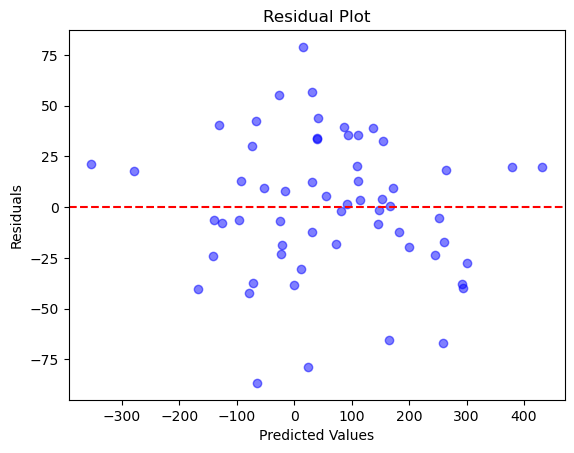

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Define feature variables (X) and target variable (y)
X = reg_df.drop(columns=['y'])  
y = reg_df['y']

# Split into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate MSE and R²
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print results
print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')
print(f'Training MSE: {mse_train:.2f}, Training R²: {r2_train:.2f}')
print(f'Testing MSE: {mse_test:.2f}, Testing R²: {r2_test:.2f}')

# Residual Plot
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


#### Your written answers here

What are your model parameters?
 - intercept: 32.68084820747811
 - Coefficients: 44.166675   80.03255319 90.51428891 86.13498446 67.48800688

What were your MSE and R^2?
 - Training MSE: 870.52
 - Training R²: 0.97
 - Testing MSE: 1131.99
 - Testing R²: 0.95



## Problem 2

Multiple Regression with Synthetic Data and Co-linearity

 - Show the correlation matrix for the 10 variables and the target variable.
 - Fit a linear regression model to the following synthetic data.
 - Calculate R^2 and MSE for your best fit model.

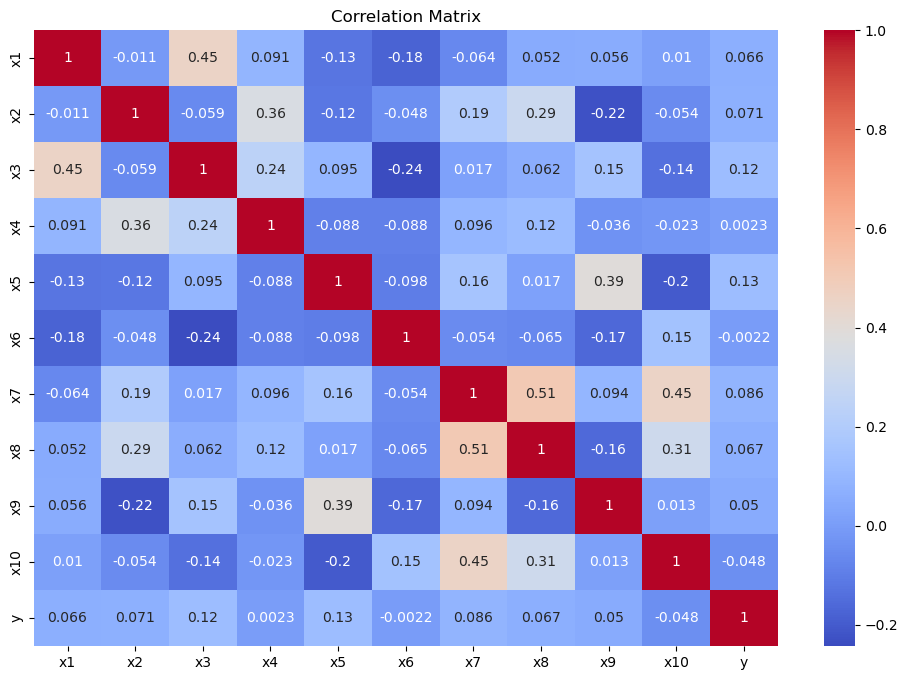

Intercept: -12.046576479253654
Coefficients: [100.54351296  68.09467682  39.08138322 -53.14977214  76.59451309
  62.1462408  111.41635577   2.41736139   0.64834276 -74.00176706]
Training MSE: 939.81, Training R²: 0.06
Testing MSE: 1006.93, Testing R²: -0.04


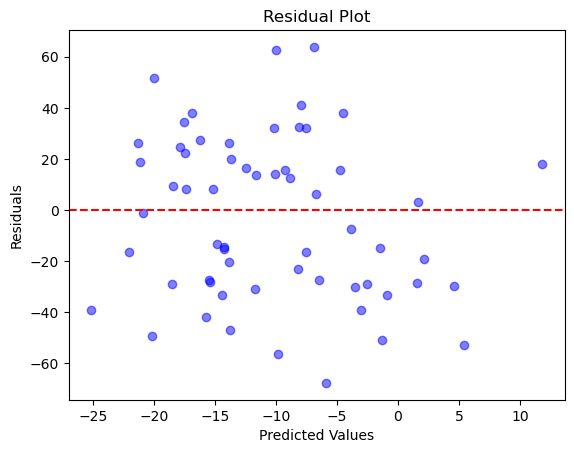

In [6]:
np.random.seed(1)
bias = 20*np.random.randn()

X, y, coef = sk.datasets.make_regression(n_samples=300, 
                                   n_features=10,    # n_features = 1 --> simple linear regression
                                   noise=30, 
                                   bias = bias, 
                                   n_informative = 6,
                                   effective_rank = 4,
                                   random_state=1, 
                                   shuffle = False, # samples will be in order
                                   coef = True) 

column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg2_df = pd.DataFrame(data = X, 
             columns = column_names)
reg2_df['y'] = y

reg2_df

# Generate synthetic data
bias = 20 * np.random.randn()

X, y, coef = make_regression(n_samples=300,  
                             n_features=10,  
                             noise=30,  
                             bias=bias,  
                             n_informative=6,  
                             effective_rank=4,  
                             random_state=1,  
                             shuffle=False,  
                             coef=True)

# Create DataFrame
column_names = [f'x{n+1}' for n in range(X.shape[1])]
reg2_df = pd.DataFrame(data=X, columns=column_names)
reg2_df['y'] = y

# Correlation Matrix
plt.figure(figsize=(12, 8))
corr_matrix = reg2_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Split Data
X = reg2_df.drop(columns=['y'])
y = reg2_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate Model
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Print Model Parameters
print(f'Intercept: {model.intercept_}')
print(f'Coefficients: {model.coef_}')
print(f'Training MSE: {mse_train:.2f}, Training R²: {r2_train:.2f}')
print(f'Testing MSE: {mse_test:.2f}, Testing R²: {r2_test:.2f}')

# Residual Plot
residuals = y_test - y_test_pred
plt.scatter(y_test_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


#### Your written answers here

What are your model parameters?
 - Intercept: -12.046576479253654
 - Coefficients: 100.54351296  68.09467682  39.08138322 -53.14977214  76.59451309
  62.1462408  111.41635577   2.41736139   0.64834276 -74.00176706

Which features (x1, x2...) were significant? Which were co-linear?

Based on the correlation matrix, co-linear features are those with high correlation (close to +1 or -1):
- 𝑥8 and 𝑥7 : Correlation 0.51
- 𝑥9 and 𝑥5 : Correlation 0.39
- 𝑥1 and 𝑥3 : Correlation 0.45
- 𝑥7 and 𝑥9 : Correlation 0.45
 
What were your MSE and R^2?
 - Training MSE: 939.81
 - Training R²: 0.06
 - Testing MSE: 1006.93
 - Testing R²: -0.04



## Problem 3

For this problem, you'll using housing data from King County, Washington (included as kc_housing.csv).

You should refer to the class notebook.

In [9]:
from sklearn.preprocessing import StandardScaler

housing_df = pd.read_csv('kc_house_data.csv')

### a. 

**Do this part before part b and then don't go back and change your responses.**

- Select three features to use for a multiple linear regression and justify your choices.
- Use the StandardScalar to scale your features. Fit a linear regression using those three features. What is your $R^2$?
- Plot predicted home values and actual home values, including a line representing perfect prediction.


R^2 for selected features: 0.51


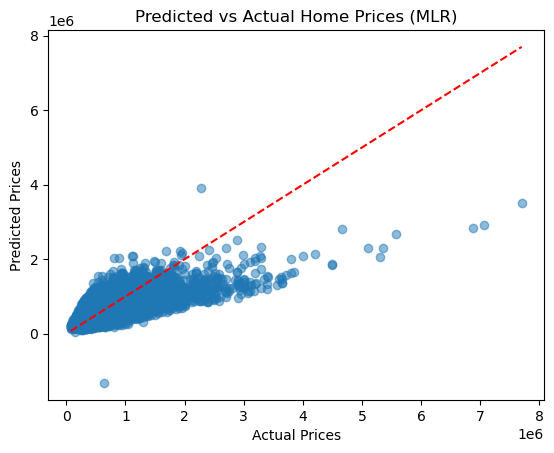

In [10]:
# Load data
housing_df = pd.read_csv('kc_house_data.csv')

# Select features (example: sqft_living, bedrooms, bathrooms)
selected_features = ['sqft_living', 'bedrooms', 'bathrooms']
X = housing_df[selected_features]
y = housing_df['price']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_scaled, y)
y_pred = lr_model.predict(X_scaled)

# Calculate R^2
r2 = r2_score(y, y_pred)
print(f'R^2 for selected features: {r2:.2f}')

# Plot predicted vs actual
plt.scatter(y, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Home Prices (MLR)')
plt.show()
# Your code here. Add cells as needed.

#### Your written answers here
Which features are you using and why?
 
 - I used sqft_living, bedrooms, and bathrooms because they directly impact home value. Larger homes with more rooms usually cost more. The model achieved an R² of 0.51, explaining 51% of the price variance.

### b. 
- Create a training and testing data using all the features except for price (that's the target), date, and zipcode. Once you have the dataframe of your features, save a list of column labels, ```feature_names = x.columns```.
- Use Lasso or Ridge regression to fit the model and calculate the $R^2$. Play around with $\alpha$ until you get $R^2 > 0.65$. Keep in mind that price is in the range of \$100k-3M and the scaled features will be in the range of -2 to 2, so $\alpha$ should be a big number.
- Get the coefficients of the Ridge or Lasso model; their order corresponds to the feature labels you saved earlier. Find the 3 biggest (absolute value) coefficients. Which features are they? Look up ```np.argsort()```; this function returns the indices of a list once it's been sorted. 
- Plot predicted vs actual home prices for the regularized model. 

R^2 for Ridge Regression: 0.70
Top 3 influential features: Index(['lat', 'sqft_living', 'grade'], dtype='object')


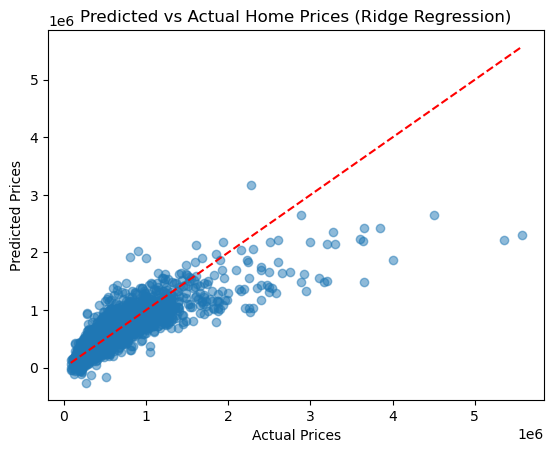

In [12]:
from sklearn.linear_model import Ridge


# Prepare data (exclude price, date, and zipcode)
features = housing_df.drop(columns=['price', 'date', 'zipcode'])
target = housing_df['price']

# Scale features
X_scaled = scaler.fit_transform(features)
feature_names = features.columns

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.2, random_state=42)

# Use Ridge regression (example, can switch to Lasso)
ridge_model = Ridge(alpha=100)  # Adjust alpha to reach R^2 > 0.65
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)

# Calculate R^2
r2_ridge = r2_score(y_test, y_pred)
print(f'R^2 for Ridge Regression: {r2_ridge:.2f}')

# Get top 3 coefficients
coefs = np.abs(ridge_model.coef_)
top3_idx = np.argsort(coefs)[-3:]
top3_features = feature_names[top3_idx]
print("Top 3 influential features:", top3_features)

# Plot predicted vs actual
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Home Prices (Ridge Regression)')
plt.show()


### Your written answers here
Which regression did you use?
 - Ridge regression

Does your regularized model look better than your MLR? How so?
 - Yes, the Ridge Regression performed better with an R² of 0.70, compared to 0.51 from the MLR. The regularization helped reduce overfitting and improved the model's ability to generalize, resulting in more accurate predictions.



### c.
It seems that our model over-valuates houses in the higher price range.
 - Split the data into homes below and above $1M sale price. 
 - Fit a Lasso or Ridge model to each of the split data sets.
 - Plot predicted vs actual.

<Your written answers>

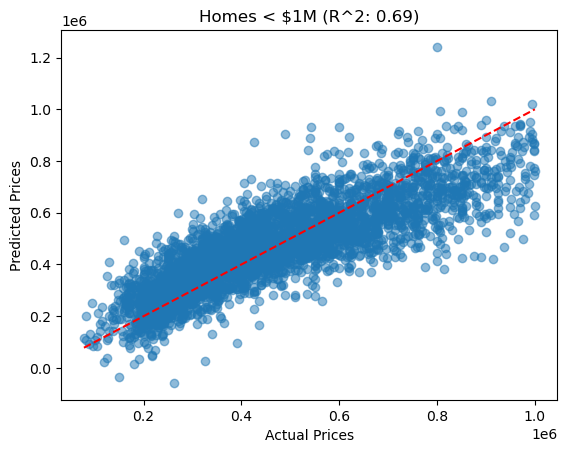

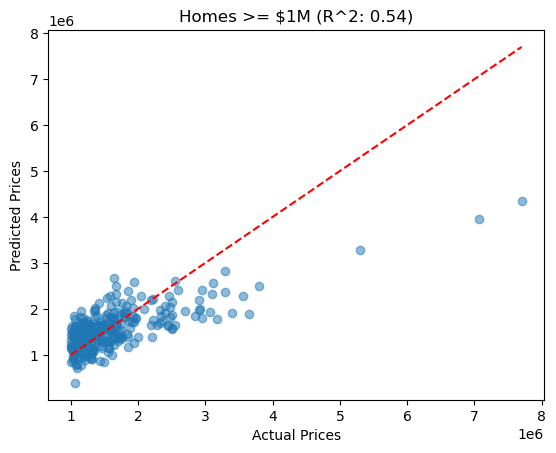

R^2 for Homes < $1M: 0.69
R^2 for Homes >= $1M: 0.54


In [13]:
# Split data into < $1M and >= $1M
low_price_df = housing_df[housing_df['price'] < 1_000_000]
high_price_df = housing_df[housing_df['price'] >= 1_000_000]

# Function to train Ridge model on split data
def train_and_plot(df, title):
    X = df.drop(columns=['price', 'date', 'zipcode'])
    y = df['price']
    X_scaled = scaler.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
    ridge_model = Ridge(alpha=100)
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    # Plot
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.title(f'{title} (R^2: {r2:.2f})')
    plt.show()
    
    return r2

# Train and plot for both datasets
r2_low = train_and_plot(low_price_df, 'Homes < $1M')
r2_high = train_and_plot(high_price_df, 'Homes >= $1M')

print(f'R^2 for Homes < $1M: {r2_low:.2f}')
print(f'R^2 for Homes >= $1M: {r2_high:.2f}')


 ### Your written answers here

 What are the $R^2$ for the two models?

  - Homes < $1M: R² = 0.69
  - Homes ≥ $1M: R² = 0.54

The model performed better on lower-priced homes (R² = 0.69) compared to higher-priced homes (R² = 0.54), indicating it predicts more accurately in the lower price range and struggles with the variability in higher-priced homes.
 
